# CS541: Applied Machine Learning, Fall 2023, Problem Set 1

### _Note: Do not delete or add blocks, do not change the function names. If you do this the autograder won't run properly and you might get a 0._

Problem set 1 is due in Gradescope on September 21 at 11:59pm.
All the questions are in this jupyter notebook file. There are four questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **100 points** (**65 pts** coding, and **35 pts** short answer).  Note that each individual pset contributes the same amount to the final grade regardless of the number of points it is worth.

After completing these questions you will need to covert this notebook into a .py file named **ps1.py** and a pdf file named **ps1.pdf** in order to submit it (details below).

**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors.**

There will be 2 separate submission links for the assignment, one to submit **ps1.py** file for autograder on the coding part, and the other one for **ps1.PDF** for manually grading on writing part. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py\
You can take a look at an example [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif)

**Submission Links**
  + PDF submission (45 pts): https://www.gradescope.com/courses/599369/assignments/3224819 
  + Python file (.py) submission (55 pts): https://www.gradescope.com/courses/599369/assignments/3224811 



**Assignment Setup**

You can use [Google Colab](https://colab.research.google.com/) for this assignment. 

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python (you should install python version >= 3.9 as this notebook is tested with python 3.9), several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html). 

If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.
 

You cannot use packages other than the ones already imported in this assignment. 

**Jupyter Tip 1**: To run a cell, press `Shift+Enter` or click on "play" button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.



**Jupyter Tip 2**: Use shortcut "Shift + Tab" to show the documentation of a function in Jupyter Notebook/ Jupterlab. Press Shift then double Tab (i.e., press Tab twice) to show the full documentation.\
For example, type `sum(` then Shift + Tab to show the documentation for the function, as shown in this the picture below.

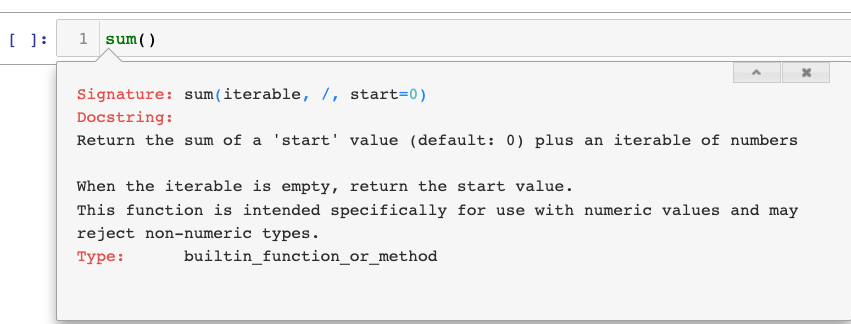

In [1]:
from IPython import display                                                                             
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/jupyter_show_document.png")


In [ ]:
## you can try it here

sum()

# **Question 1.** Using Numpy to manipulate data (*10 total points*)

You learned about [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html#installing-numpy) in Lab 1. Numpy supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices. 

When implementing machine learning models, you will often find yourself having to perform complicated operations on arrays of data. 

For example, say you are training a model to predict words of a story you wrote. Each word is represented by a class number in your data. Hence, predicting the right word becomes a classification problem at each step- the model needs to precict the correct word class out of the posible classes for all words. Let's go through what we need to do to prepare such data and you will see how often you will need numpy operations to format the data.  


## **1.0. Code**: Converting classes to one-hot vectors *(3 pts)*


Let's start with a one line story: "a cat jumps over a fence"

Let's assume you have an array that has translated this sentence to a number for each word:

`[0, 10, 34, 87, 0, 55]` - So, for example, "cat" is 10. 

Imagine you have $100$ words in your total vocabulary - of which, we are only using six words here in the one sentence. 

Recall, that in classification, a model predicts a vector of total class size. For example, if you have only 10 classes, the output of the model would be something like:

`[0.05, 0.02, 0.03, 0.4, 0.2, 0.1, 0.05, 0.05, 0.01, 0.09]`

The predicted class is the `argmax` of the output vector - the position of the max score. Hence, the class predicted by the model above is `3` since the third index (index starts from 0) has the highest value.

Now, to train the model, you may often have to convert your class numbers to a format above where you have a `1` for the position of the correct class and `0` elsewhere. 
So, if the correct class for the above example was indeed `3`, the training data would have looked like: 

`[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`

This is called a 1-hot representation.
Your first task is to convert your data  - a list of numbers depicting the word class in your sentence - into an array where each row is a one-hot representation of the word class in the sentence. So, for the sentence gives, you will have 6 rows for each of the 6 words in sequence. 

In [175]:
# First, we need to import numpy, and name it as np for brevity. 
# This is a widely adopted convention that you should follow so that people can easily understand it.
import numpy as np 

sentence = [0, 10, 34, 87, 0, 55]

Now, write a function below that takes the sentence vector as an input and outputs a 1-hot representation. Each row should have a 1 at the correct position where the position indcated the word class.
DO NOT use for-loops in your code. In the real world when training large models, you will have billions of such words, and hence using for-loops will be impractical.

In [2]:
def question_1(sentence):
    """
    DO NOT change the name of the function. 
    given a sentence vector, convert to one-hot. 
    """
    # Write your code in this block -----------------------------------------------------------
    total_words = np.amax(sentence) if np.amax(sentence) > 100 else 101
    words = np.array(sentence)
    
    one_hot = np.zeros((len(words), total_words))
    one_hot[np.arange(words.size), words] = 1
    
    # End of your code ------------------------------------------------------------------------
    return one_hot


# test your function, using the example.
# We will test your function with more test cases when grading
one_hot = question_1(sentence)
print(one_hot.shape)

(6, 101)


## **1.1 Code:** Padding to create a batch *(7 pts)*

While training, one sentence may not cut it. You will usually have hundreds of such sentences in a batch. 
However, each sentence will be of a variable size. You cannot create an array where each entry is of a different size in numpy. Hence, a common way to get around this is to pad shorter sentences to make them all the same size. Let's say we use introduce a new class number of `100` to represent pad (recall that you have 100 actual words `0-99`). 


Your job is to now create a padded representation given multiple sentences of variable lengths.

You CANNOT use for-loops for the exercise. In the real world when training large models, you will have billions of such words, and hence using for-loops will be impractical. 

Feel free to use the function you defined above if it helps.

In [3]:
def question_2(arr: np.ndarray) -> np.ndarray:
    """
        Given a list of padded entries with pad class 100.
    """
    # Write your code in this block -----------------------------------------------------------
    
    words = arr.flatten()
    arr_size = len(arr)
    max_word_index = np.amax(arr)
    
    padded_onehot = question_1(words)
    
    padded_onehot = padded_onehot.reshape(7, 9, 101)
    
    # End of your code ------------------------------------------------------------------------
    return padded_onehot
    
    
## test your function using an example
## note that `sentences` is an example for the test case. We will test your function with more test cases.

sentences = [
    [1, 0, 21, 9, 0, 77, 98, 100, 100],
    [3, 58, 21, 98, 0, 77, 100, 100, 100],
    [2, 4, 21, 95, 1, 77, 98, 10, 100],
    [83, 45, 2, 9, 3, 77, 98, 11, 12],
    [33, 45, 1, 9, 4, 77, 8, 100, 100],
    [73, 45, 17, 9, 100, 100, 100, 100, 100],
    [13, 45, 22, 9, 60, 77, 58, 78, 77],
]

padded_out = question_2(np.array(sentences))

print("padded output:\n", padded_out)

padded output:
 [[[0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

# **Question 2**. Data splitting (*10 total points*)

Now that you have learned how to format data, we will need to desice which part of the data to train with and which part ot test with. 

Above, we were working with a toy dataset. 

First, we will download a real-world dataset.

The data is about flowers. Imagine we need to detect a flower category based on attributes like petal width, size, etc.  

## 2.0. Download Data

First, you need to follow the tutorial [here](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) to get used to Pandas, such as how to select some subset of table, how to derive a new column from existing ones.

Then, you will need to complete the questions at the end of this sections.


In this problem set, we mostly work with Iris dataset.\
The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [4]:
import pandas as pd
import random

## path to the csv file, we can read from an url or a local file on the machine
iris_path = "https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/iris.csv" 

## read the iris dataset as a dataframe
df = pd.read_csv(iris_path)

## print the random 5 rows of the dataframe
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
49,5.0,3.3,1.4,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
142,5.8,2.7,5.1,1.9,Virginica
121,5.6,2.8,4.9,2.0,Virginica
146,6.3,2.5,5.0,1.9,Virginica


## 2.1. **Code:** Create class labels (2 pts)

Given the Iris dataset above, map the names in "variety" to class labels. Map "Virginica" to 0, "Versicolor" to 1, and "Setosa" to 2.

The input to the model will be the four attributes - sepal.length, sepal.width, petal.length, petal.width. The output of the model will be the corresponding class label. 

Hence, you should create an 2-D array for the input that has the 4 attribute values in each row - let's call this `X`. Similarly, you should create a 1-D array with the class labels for each row in the input - let's call this `y`.

In [56]:
def question_3(data):
    # Write your code in this block ----------------------------------------------------------
    ref = {"Virginica":0, "Versicolor":1, "Setosa":2}
    X = data[:, 0:4]
    y = [ref[i] for i in data[:, 4]]
  
    # End of your code ------------------------------------------------------------------------
    return X, y

data = df.to_numpy() 
np.random.shuffle(data) 
# this is list like:
#[[5.3 3.7 1.5 0.2 'Setosa']
# [5.0 3.3 1.4 0.2 'Setosa']
# [7.0 3.2 4.7 1.4 'Versicolor']
# [6.4 3.2 4.5 1.5 'Versicolor']]

# you need to convert the last column to the class labels - 0,1,2 and create X and y. X should have the first 3 columns and y should have the labels. 

X, y = question_3(data)

## 2.2 **Code:** Split into train and test (3pts)

A common practice is to split the data into 3 parts - training, validation, and test. 

Training set is used to train the model - no surprises here. 
Validation set is used to choose the hyperparameters like the learning rate. So, you can try various learning rates and check which one performs best on the validation set. 

Finally, to report the performance, we will test the best performing model on the validation set on the test set. 

However, for simplicity, we will just be using train and test here since there aren't many hyperparameters to tune. 
Let's use 80% of the data to train, 20% to test.

Hence, we need the following arrays from the `X` and `y` you just created:
    
- Training set (80%):
    - `X_train`: training attributes
    - `y_train`: training labels
- Testing set (20%):
    - `X_test`: test attributes
    - `y_test`: test labels

To ensure there is an equal distribution of all labels in both the training and testing set, randomly choose $80\%$ of the "Setosa" entries, $80\%$ of "Virginica" entries and $80\%$ of "Versicolor" entries in `X_train` and the labels in `y_train`.
Put the rest in `X_test` and `y_test`. 

In [57]:
from sklearn.model_selection import train_test_split

def question_4(X, y):
    # Write your code in this block -----------------------------------------------------------
    # format the downloaded csv data file to output the 4 arrays- X_train, y_train, X_test, y_test
    
    setosa_X = []
    virginica_X = []
    versicolor_X = []
    
    setosa_y = []
    virginica_y = []
    versicolor_y = []
    
    for i in range(0, len(y)):
        if y[i] == 2:
            setosa_X.append(X[i])
            setosa_y.append(y[i])
        elif y[i] == 0:
            virginica_X.append(X[i])
            virginica_y.append(y[i])
        elif y[i] == 1:
            versicolor_X.append(X[i])
            versicolor_y.append(y[i])
            
    setosa_train_X, setosa_test_X, setosa_train_y, setosa_test_y = train_test_split(setosa_X, setosa_y, test_size=0.2)
    setosa_train_X = np.array(setosa_train_X)
    setosa_test_X = np.array(setosa_test_X)
    setosa_train_y = np.array(setosa_train_y)
    setosa_test_y = np.array(setosa_test_y)
    
    virginica_train_X, virginica_test_X, virginica_train_y, virginica_test_y = train_test_split(virginica_X, virginica_y, test_size=0.2)
    virginica_train_X = np.array(virginica_train_X)
    virginica_test_X = np.array(virginica_test_X)
    virginica_train_y = np.array(virginica_train_y)
    virginica_test_y = np.array(virginica_test_y)
    
    versicolor_train_X, versicolor_test_X, versicolor_train_y, versicolor_test_y = train_test_split(versicolor_X, versicolor_y, test_size=0.2)
    versicolor_train_X = np.array(versicolor_train_X)
    versicolor_test_X = np.array(versicolor_test_X)
    versicolor_train_y = np.array(versicolor_train_y)
    versicolor_test_y = np.array(versicolor_test_y)
    
    X_train = np.concatenate([setosa_train_X, virginica_train_X, versicolor_train_X])
    X_test = np.concatenate([setosa_test_X, virginica_test_X, versicolor_test_X])
    y_train = np.concatenate([setosa_train_y, virginica_train_y, versicolor_train_y])
    y_test = np.concatenate([setosa_test_y, virginica_test_y, versicolor_test_y])
    
    # End of your code ------------------------------------------------------------------------
    return X_train, y_train, X_test, y_test

# Test your function
X_train, y_train, X_test, y_test = question_4(X, y)

## 2.3 **Code:** Training Bias (5 pts)

An important theme in machine learning is the effect of training bias on testing. To illustrate this, let's create a split where the training set is biased towards a label and the test is biased to another. 

This time, instead of randomly splitting the `X` and `y`, randomly choose $95\%$ of the "Setosa" entries, $20\%$ of "Virginica" entries and $50\%$ of "Versicolor" entries in `X_train_biased` and the labels in `y_train_biased`. 

Put the rest in the `X_test_biased` and `y_test_biased`. 

In [58]:
def question_5(X, y):
    # Write your code in this block -----------------------------------------------------------
    # format the downloaded csv data file to output the 4 arrays- X_train, y_train, X_test, y_test
    setosa_X = []
    virginica_X = []
    versicolor_X = []
    
    setosa_y = []
    virginica_y = []
    versicolor_y = []
    
    for i in range(0, len(y)):
        if y[i] == 2:
            setosa_X.append(X[i])
            setosa_y.append(y[i])
        elif y[i] == 0:
            virginica_X.append(X[i])
            virginica_y.append(y[i])
        elif y[i] == 1:
            versicolor_X.append(X[i])
            versicolor_y.append(y[i])
            
    setosa_train_X, setosa_test_X, setosa_train_y, setosa_test_y = train_test_split(setosa_X, setosa_y, test_size=0.05)
    setosa_train_X = np.array(setosa_train_X)
    setosa_test_X = np.array(setosa_test_X)
    setosa_train_y = np.array(setosa_train_y)
    setosa_test_y = np.array(setosa_test_y)
    
    virginica_train_X, virginica_test_X, virginica_train_y, virginica_test_y = train_test_split(virginica_X, virginica_y, test_size=0.5)
    virginica_train_X = np.array(virginica_train_X)
    virginica_test_X = np.array(virginica_test_X)
    virginica_train_y = np.array(virginica_train_y)
    virginica_test_y = np.array(virginica_test_y)
    
    versicolor_train_X, versicolor_test_X, versicolor_train_y, versicolor_test_y = train_test_split(versicolor_X, versicolor_y, test_size=0.8)
    versicolor_train_X = np.array(versicolor_train_X)
    versicolor_test_X = np.array(versicolor_test_X)
    versicolor_train_y = np.array(versicolor_train_y)
    versicolor_test_y = np.array(versicolor_test_y)
    
    X_train = np.concatenate([setosa_train_X, virginica_train_X, versicolor_train_X])
    X_test = np.concatenate([setosa_test_X, virginica_test_X, versicolor_test_X])
    y_train = np.concatenate([setosa_train_y, virginica_train_y, versicolor_train_y])
    y_test = np.concatenate([setosa_test_y, virginica_test_y, versicolor_test_y])
  
    # End of your code ------------------------------------------------------------------------
    return X_train, y_train, X_test, y_test

# Test your function
X_train_biased, y_train_biased, X_test_biased, y_test_biased = question_5(X, y)

# **Question 3.** Using Scikit-learn to learn a classifier (*35 total points*)

[scikit-learn](https://scikit-learn.org/stable/getting_started.html) (also known as `sklearn`) is a useful tool for model fitting, data preprecessing, model evaluation and many other utilities. It provides many built-in machine learning algorithms. If you haven't had the package: `pip install -U scikit-learn --user`

## 3.0. Brief Tutorial 

You should take a look at [this tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) to get an overview of Sklearn. After that, you will use Sklearn to train a KNN model. Following is the code to set up the dataset for the model.

In [59]:
from sklearn import metrics, model_selection, preprocessing, neighbors
from sklearn.model_selection import train_test_split

## Check on the shape of training and test sets that you created above.
print(X_train.shape, X_test.shape)
print(X_train_biased.shape, X_test_biased.shape)

(120, 4) (30, 4)
(82, 4) (68, 4)


In [60]:
## Standardize the features 
sc = preprocessing.StandardScaler()  
sc.fit(X_train)  # use X_train to compute descriptive statistics like mean, std

X_train = sc.transform(X_train)  # Standardize the training set
X_test = sc.transform(X_test) # Standardize the test set

print("Train input: \n" + str(X_train))
print("Test input: \n" + str(X_test))

sc = preprocessing.StandardScaler() 
sc.fit(X_train_biased)  # use X_train to compute descriptive statistics like mean, std

X_train_biased = sc.transform(X_train_biased)  # Standardize the training set
X_test_biased = sc.transform(X_test_biased) # Standardize the test set

Train input: 
[[-0.19040293  1.78915935 -1.18214135 -1.20970303]
 [-0.93952922  0.5802679  -1.18214135 -0.9396298 ]
 [-0.93952922  0.82204619 -1.29723828 -1.34473965]
 [-1.81350988  0.33848961 -1.4123352  -1.34473965]
 [-0.93952922  1.78915935 -1.29723828 -1.20970303]
 [-1.0643836   0.82204619 -1.23968981 -1.07466642]
 [-1.0643836   1.30560277 -1.35478674 -1.34473965]
 [-1.56380112  0.82204619 -1.35478674 -1.20970303]
 [-1.18923798 -0.14506697 -1.35478674 -1.34473965]
 [-0.68982045  1.54738106 -1.29723828 -1.34473965]
 [-0.44011169  2.75627252 -1.35478674 -1.34473965]
 [-1.18923798  0.09671132 -1.29723828 -1.47977627]
 [-0.44011169  1.06382448 -1.4123352  -1.34473965]
 [-0.81467483  2.51449423 -1.29723828 -1.47977627]
 [-0.56496607  2.03093764 -1.4123352  -1.07466642]
 [-0.56496607  0.82204619 -1.18214135 -1.34473965]
 [-0.56496607  2.03093764 -1.18214135 -1.07466642]
 [-1.56380112  1.30560277 -1.58498059 -1.34473965]
 [-1.0643836   0.33848961 -1.46988367 -1.34473965]
 [-1.0643836  -0.

## 3.1. Code: KNN (5 pts)

Use Sklearn to train a KNN model. You may find [this](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) link helpful.

Let's train using both the randomly sampled train and the biased train sets you created above. 

In [61]:
from sklearn.neighbors import KNeighborsClassifier

def question_6(X_train: np.array, y_train: np.array, n_neighbors: int, metric: str) -> neighbors.KNeighborsClassifier:
    """
        X_train: features
        y_train: label
        n_neighbors: number of neighbors
        metric: Metric to use for distance computation, e.g., 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'
        return a trained Sklearn's KNN model
    """
    # Write your code in this block -----------------------------------------------------------
 
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model.fit(X_train, y_train)
    
 
    # End of your code ------------------------------------------------------------------------
    return model

## Test your function
model = question_6(X_train, y_train, n_neighbors = 5, metric="l1")
model_biased = question_6(X_train_biased, y_train_biased, n_neighbors = 5, metric="l1")

## 3.2. Code: Accuracy score (5 pts)

 Compute the accuracy score of a model using both the randomly sampled train and test sets. Also, compute the accuracy when trained on the biased splits. 

In [62]:
from sklearn.metrics import accuracy_score

def question_7(model: neighbors.KNeighborsClassifier, X_test: np.array, y_test: np.array) -> float:
    """
        model: Sklearn's KNN model that you have trained
        X_test: features
        y_test: label
        return accuracy score of the model on test set (i.e., X_test, y_test)
    """
    # Write your code in this block -----------------------------------------------------------
    # You can use `accuracy_score` from Sklearn.
    prediction = model.predict(X_test)
    
    correct_result = y_test
    
    return accuracy_score(prediction, correct_result)

    # End of your code ------------------------------------------------------------------------

## Test your function 
## Your model should work well on this dataset, with an accuracy 91-97%
print("Accuracy with balanced train and test splits: ", question_7(model, X_test, y_test))

## What do you notice about performance with biased data?
print("Accuracy with biased train data: ", question_7(model_biased, X_test_biased, y_test_biased))




Accuracy with balanced train and test splits:  0.9666666666666667
Accuracy with biased train data:  0.8970588235294118


Here on out, let's just use the randomly shuffled splits to the do the rest of the experiments.

## 3.3. Short answer: Parameter tuning (5 pts)

You should try out different values for `n_neighbors` and `metric` for KNN model in the previous question.
For example, try `n_neighbors`=2, 3, or 4,  and `metric`='cosine' or 'euclidean'.\
Which is the best setting with the best accuracy you got on this dataset? 

Write your answer in this block

**Your Answer:**

`n_neighbors`=5 && `metric`='l1'

## 3.4. Code: Cross Validation (CV) (5 pts)

One way to train the model is splitting the dataset into *train*, and *test set*. 

We can aslo split the data into $k$-folds as follows.
We train the model $k$ times: each time, we use 1 fold for testing, and the rest for training.\
The picture below demonstrates how k-fold cross validation works (folds in blue mean test sets).


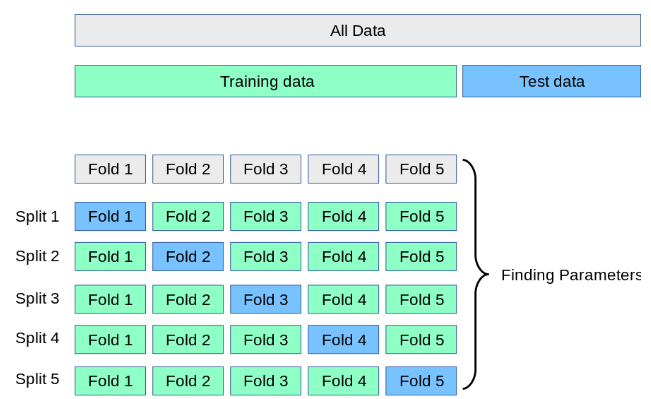

In [63]:
from IPython import display
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/kfold.png")

Write a function to compute the Cross Validation accuracy of a KNN model on Iris dataset.


In [64]:
from sklearn.model_selection import cross_val_score

def question_9(X: np.ndarray, y: np.ndarray, n_neighbors: int, k: int) -> float:
    """
        X: features, shape of (N, 4), where N is the number of samples
        y: labels, shape of (N, )
        n_neighbors: number of neighbors in KNN
        k: the number of folder in k-fold CV
    return: the average of CV accuracies on k folds. It should be a float number in [0, 1]
    """
    # Write your code in this block -----------------------------------------------------------
    #    first, initialize a KNeighborsClassifier object,
    #    then use `cross_val_score` from sklearn to compute the CV accuracy for each fold
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    return np.average(cross_val_score(model, X, y, cv=k))

    # End of your code ------------------------------------------------------------------------

## test your function, the result should be at least 90%
question_9(X, y, 4, 5)

0.96

## 3.5. Code: Plot (10 pts)



Plot a graph to show how `n_neighbors` affects the performance of KNN on Iris dataset.

You can use seaborn (https://seaborn.pydata.org/) or matplotlib (https://matplotlib.org/) for this question.


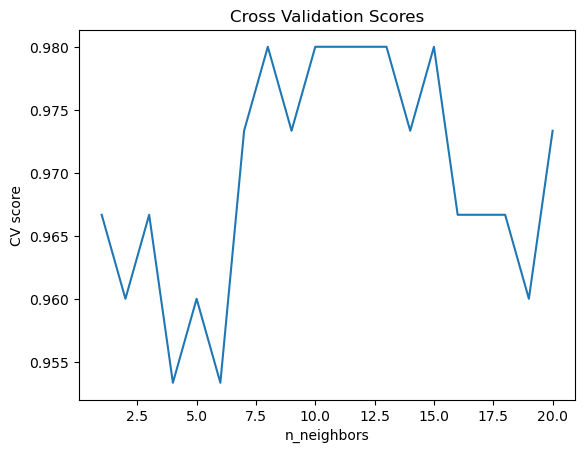

In [65]:
from typing import List 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns  

def question_10(X: np.ndarray, y: np.ndarray, n_neighbors_list: List[int], k: int)-> None:
    """
         X: features, shape of (N, 4), where N is the number of samples
         y: labels, shape of (N, )
         n_neighbors_list: list of `n_neighbors`
         k: the number of folder in k-fold CV
    """
    
    # Write your code in this block ----------------------------------------------------------- 
    
    scores = [question_9(X=X, y=y, n_neighbors=n, k=k) for n in n_neighbors_list]
    
    fig, ax = plt.subplots()
    ax.plot(n_neighbors_list, scores)
    ax.set_title("Cross Validation Scores")
    ax.set_xlabel("n_neighbors")
    ax.set_ylabel("CV score")

    # End of your code ------------------------------------------------------------------------

    return None
    
    
## test your function. Your function should plot a similar graph as shown below.
n_neighbors_list = list(range(1,21))
k=3
question_10(X, y, n_neighbors_list, k)

## 3.6. Short answer: Learning Curve (5 pts)

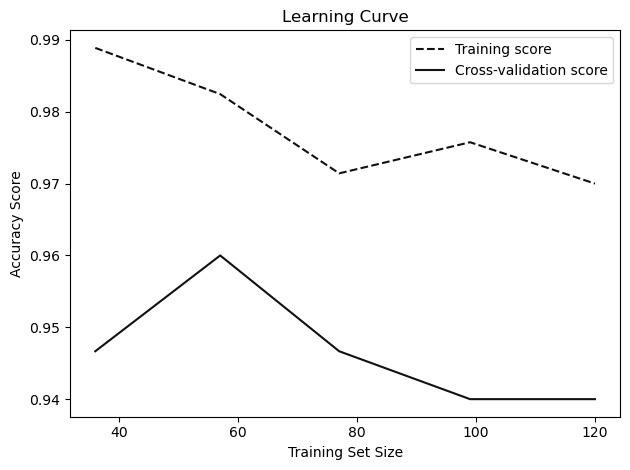

In [55]:
## Learning Curve: How training size affect CV accuracy score

def plot_learing_curve(model):
    if not getattr(model, "fit", None):
      print("'model' should be a Sklearn's model!")
      return 


    # Create training and test scores for various training set sizes
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', 
                                                        train_sizes=np.linspace(0.3, 1.0, 5))

    # Create means of training set scores and test set scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()
    
    
## Plot the learning curve for KNN model
plot_learing_curve(model)

How training set size affect the performance of KNN model?

Write your answer in this block

**Your Answer:**

As the training set becomes larger, the cross validation score decreases while the training score decreases. The training score becomes larger because with the constant number of neighbors, the ratio of selected data points to be classified would be smaller, which means for the training dataset, it will fit to a smaller portion of data.  However, the cross validation score decreases because the constant number of neighbors but larger training set size can cause overfitting. 

# **Question 4**. Using Classifiers (*total 45 points*)

## 4.1. Code: KNN using Numpy (25 points)

In this section, we re-implement KNN from scratch using numpy.\
You need to complete following methods of `KNN` class.\
Note that for this question, you are NOT allowed to use sklearn. 

In [158]:
class KNN():
    """
        KNN using numpy.
        For simplicity, we only implement the class with `weights`='uniform'.
    """

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.weights = "uniform"
        self.n_classes = 3  ## for Iris dataset

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        return self

    def compute_euclidean_distance(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        """
           Compute euclidean distance of each samples in A and B  (20 points)
           A: np.ndarray, shape: (num samples a, feature_dim=4)
           B: np.ndarray, shape: (num sample b, feature_dim=4)
           Return a 2-d array, shape of (a, b)
        """
        # Write your code in this block -----------------------------------------------------------
        # Using for loops is acceptable, but think how to use numpy vectorization (instead of for loops) for this function.
        
        b = B
        
        distance = [np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2 + (a[3] - b[3])**2) for a in A]
        return distance

        # End of your code ------------------------------------------------------------------------

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """
            Return a numpy array of shape (num_samples, 1) as the predictions  (20 points)
        """

        # Write your code in this block -----------------------------------------------------------
        distances = np.array([])
        labels = np.array([])
        result_arr = np.array([])
        
        for x in X_test:
            labels = np.transpose(np.array([y_train]))
            distances = np.array(self.compute_euclidean_distance(X_train, x))
            
            sort = np.argsort(distances)
            distances = distances[sort]
            labels = labels[sort]
            
            labels = np.reshape(np.array(labels[:5]), (5,))
            
            result = np.bincount(labels).argmax()
            
            result_arr = np.append(result_arr, [result])
        
            
        return result_arr
        
        
        # End of your code ------------------------------------------------------------------------

    def score(self, X_test: np.ndarray, y_test: np.ndarray) -> float:
        """
            Get accuracy score on test set  (10 points)
            return: a float number in range of [0,1]
        """
        # ------------------------------------------------------------------------------------------
        # Write your code in this block
        # Note: You can NOT use "accuracy_score()" from sklearn.
        
        accuracy = np.sum(self.predict(X_test=X_test) == y_test) / len(y_test)
        
        
        return accuracy
        
        # ------------------------------------------------------------------------------------------

In [159]:
## Test our class: compare our implementation with Sklearn's. The results should be the same
n_neighbors = 3
our_classifier = KNN(n_neighbors=n_neighbors).fit(X_train, y_train)
sklearn_classifier = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)

our_acc = our_classifier.score(X_test, y_test)
sklearn_acc = sklearn_classifier.score(X_test, y_test)

pd.DataFrame([[our_acc, sklearn_acc]],
             ["Accuracy"],    
             ["Our KNN", "Sklearn's KNN"])

,Our KNN,Sklearn's KNN
Accuracy,0.966667,0.966667


## 4.2. Short answer: Decision Tree (5 pts)

We can use sklearn to create a decision tree as follows

In [160]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(22)

## read Iris dataset
df = pd.read_csv(iris_path)

## Split train/test on data frame
test_size = 0.3
msk = np.random.rand(len(df)) > test_size
train = df[msk]
test = df[~msk]

## Train a Sklearn's decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train.drop(columns=["variety"]), train["variety"])
print("accuracy on test set:", decision_tree.score(test.drop(columns=["variety"]), test["variety"]))

accuracy on test set: 0.9782608695652174


     sepal.length  sepal.width  petal.length  petal.width    variety
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
5             5.4          3.9           1.7          0.4     Setosa
7             5.0          3.4           1.5          0.2     Setosa
..            ...          ...           ...          ...        ...
142           5.8          2.7           5.1          1.9  Virginica
143           6.8          3.2           5.9          2.3  Virginica
144           6.7          3.3           5.7          2.5  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica

[104 rows x 5 columns]


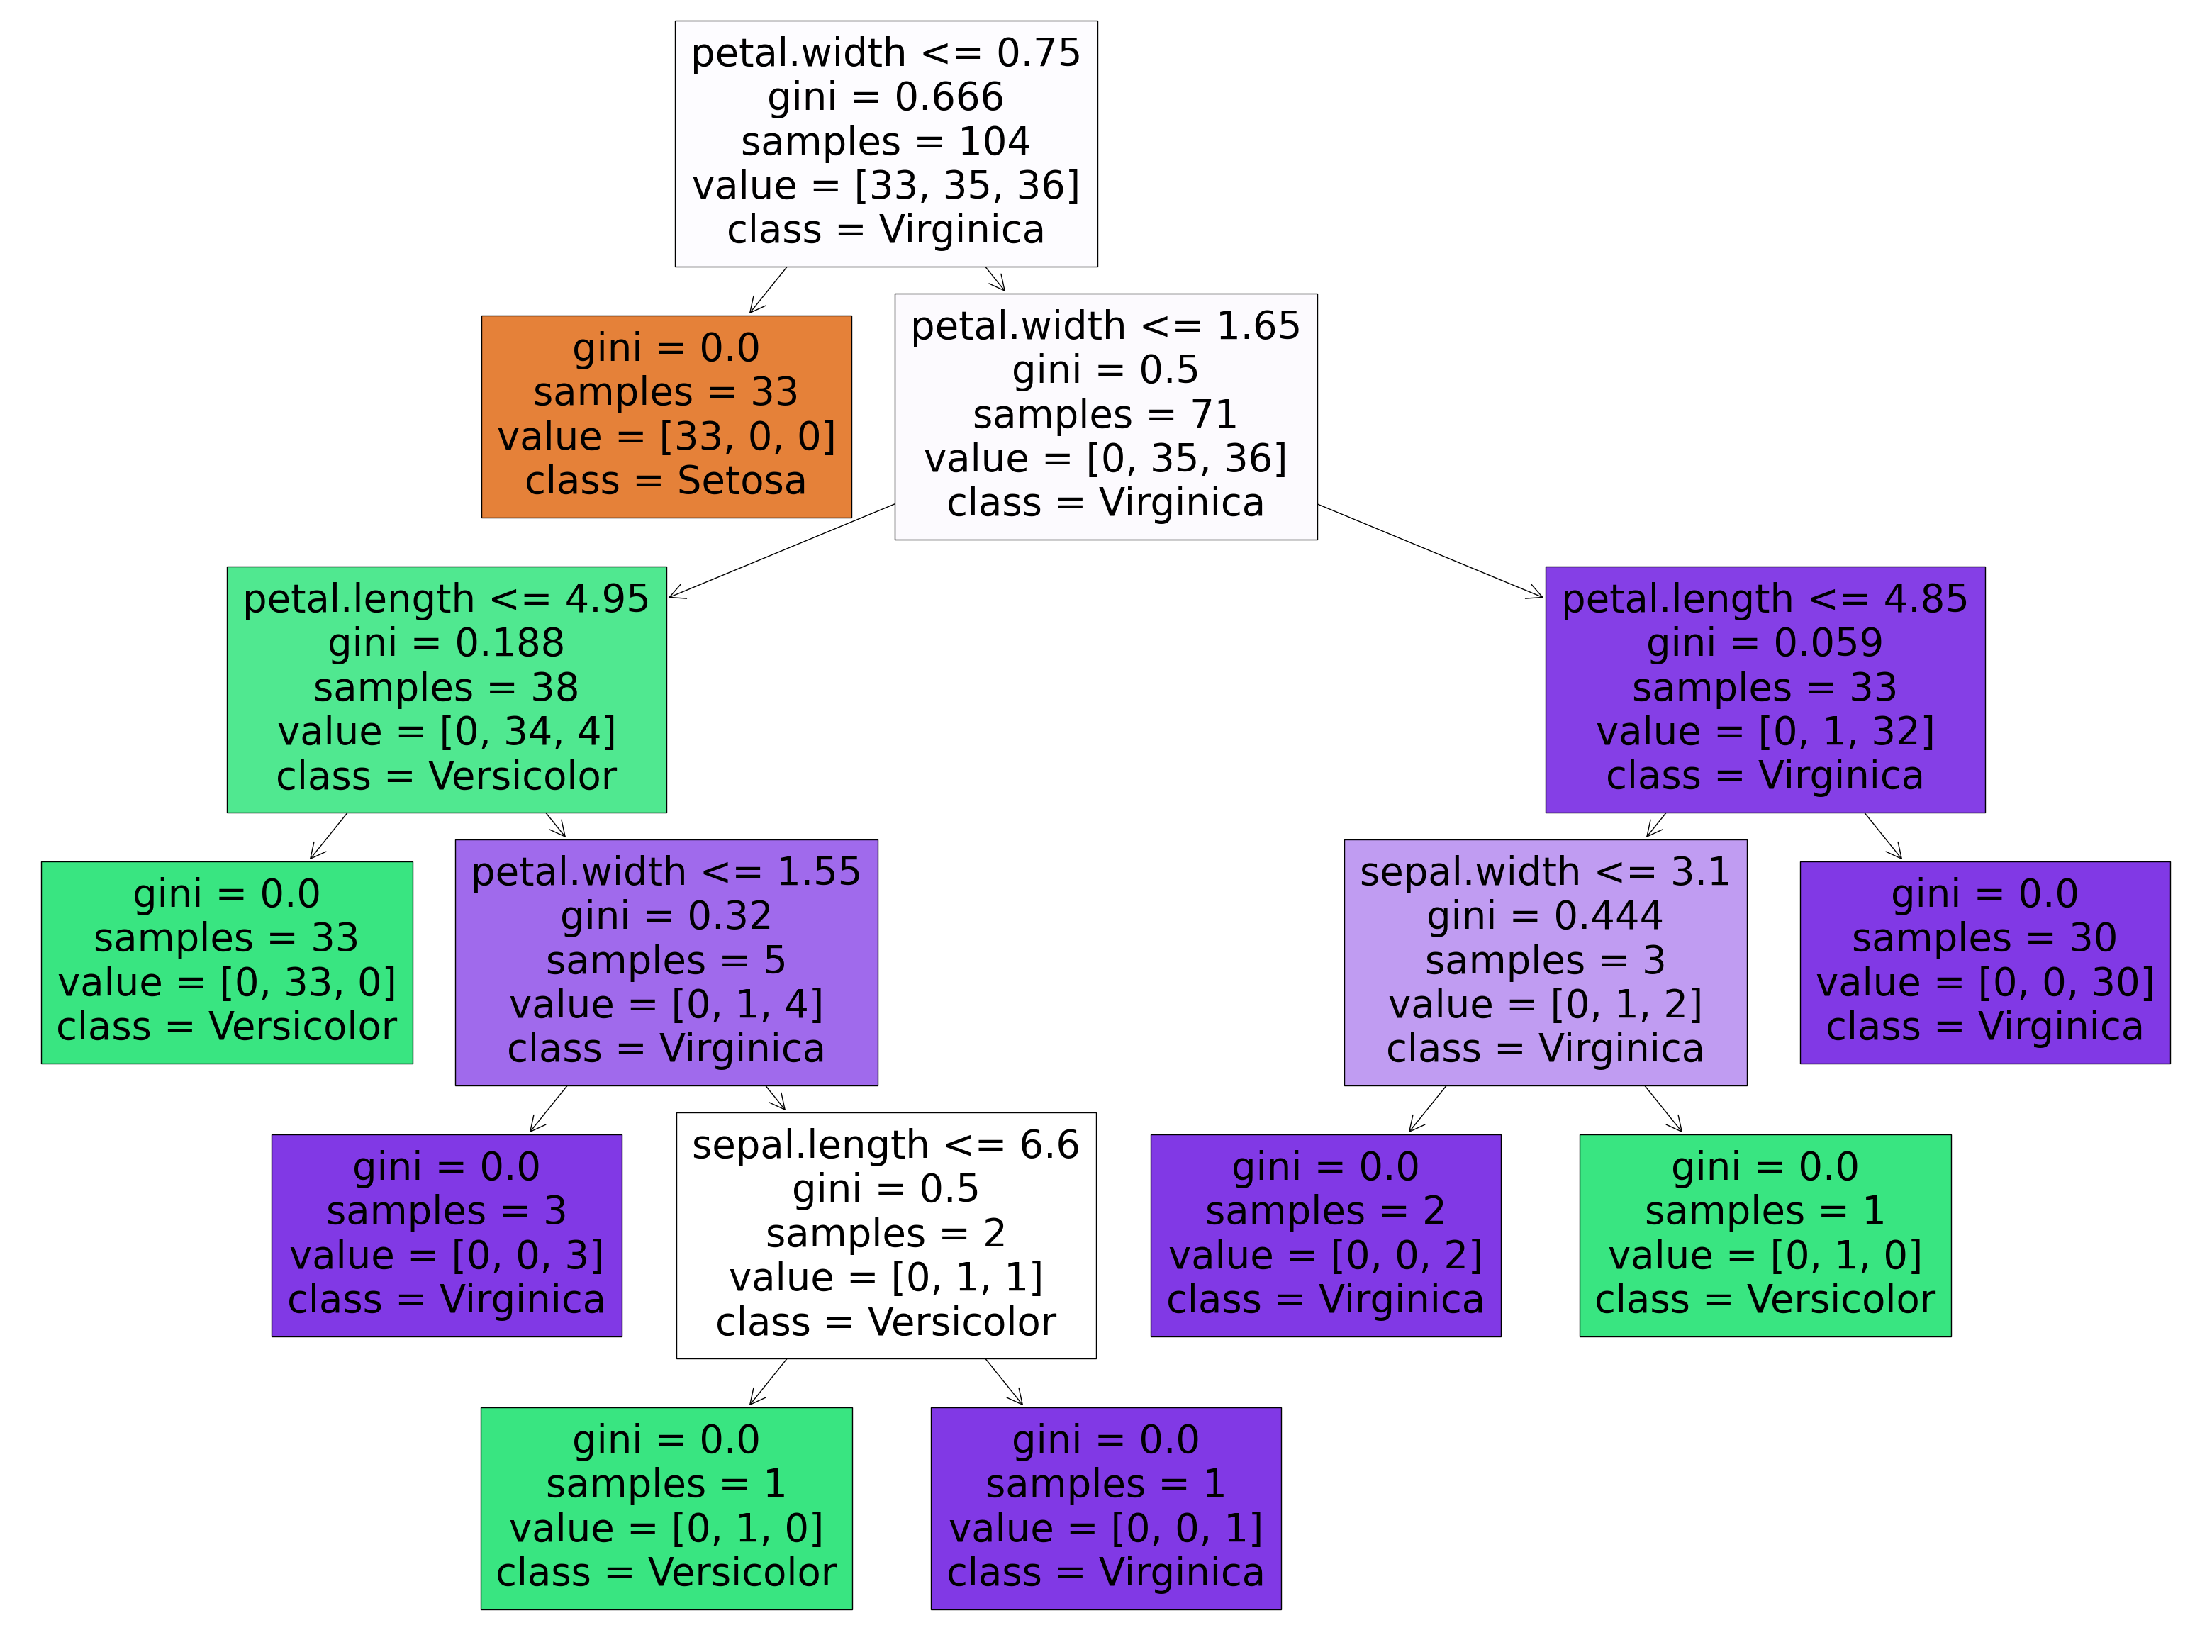

In [167]:
## Visualize the tree
from sklearn import tree

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(decision_tree, 
                   feature_names=list(df.columns[:-1]),  
                   class_names=list(df.variety.unique()),
                   filled=True)

print(train)

Let's say we want to make a prediction for this sample:

In [165]:
## show 1 sample
sample = test.iloc[0:1]
sample

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa


In [166]:
## Let's see what the model predicts for the sample you have seen above
decision_tree.predict(sample.drop(columns=["variety"]))

array(['Setosa'], dtype=object)

Explain how the decision tree made that prediction by pointing out the path from the root to its leaf.

Write your answer in this block

**Answer:**

The decision tree accomplishes classification by separating the training dataset by features in the dataset, for example, the size of petals and sepals. Each node inside the decision tree evaluate a condition over the parameter. Depending on the true or false result of the evaluation, it would proceed down to the subtree of the node, evaluating the next condition. The best prediction is made when the deeper node condition evaluations are reached. 

## 4.3. Short answer: Overfitting (5 pts)

The picture below shows the decision boundary of 3 classifiers on the same dataset.
Which one is likely to overfit on the dataset? Briefly explain your answer.

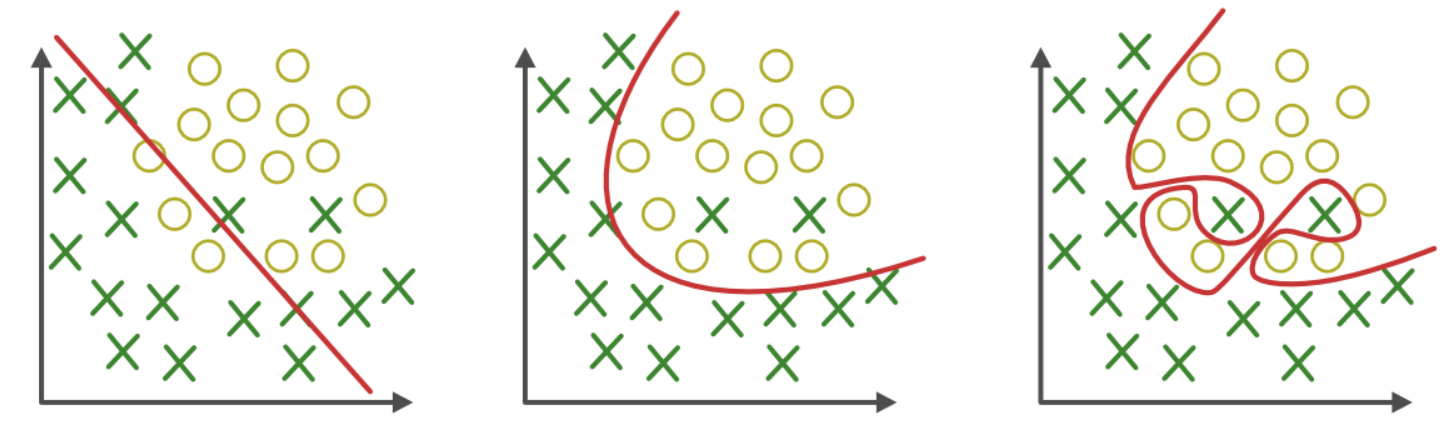

In [168]:
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/overfitting.png")

Write your answer in this block

**Answer:**

The classifier on the right is most likely to overfit on the dataset. Given the training set, the classifier appears to perfectly classify all the training data point to their actual result. This would yield high training accuracy yet for unseen data points, the classifier might yield result heavily influenced by the training dataset. If the training dataset contains bias, the classifier would therefore give inaccurate results.

## 4.4. Short answer: SVM transformation (5 pts)

Given a 2-D dataset as shown below. The 2 classes (denoted in blue and red) are not linearly seperable.\
Suggest a 1-D transformation that can make the dataset in the picture below linearly separable?

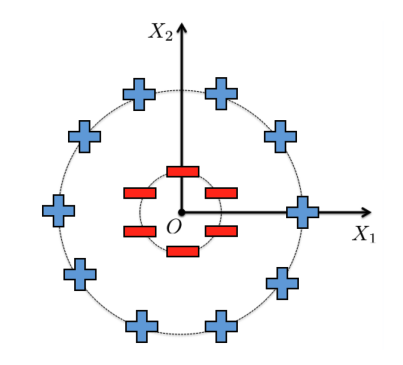

In [169]:
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/svm.png")

Write your answer in this block

**Answer:**

Radial Bias Function (RBF) Kernel


## 4.5. Short answer: SVM Regularization (5 pts)

We will work on a new dataset to train a SVM model


We will plot Decision Boundary of a SVM model with different values of regularization `C`.

<Axes: >

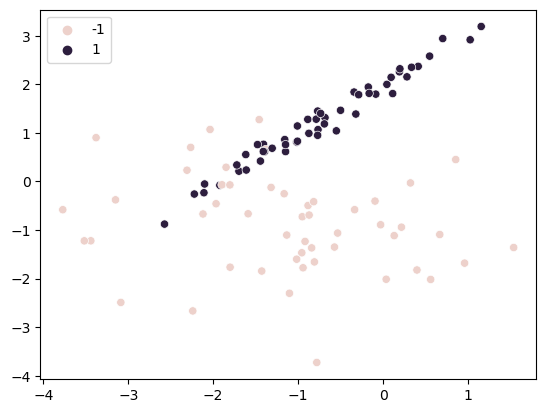

In [170]:
import sklearn
from sklearn.datasets import make_classification, make_circles

import matplotlib.pyplot as plt
from sklearn import svm, datasets


## Make a dummy dataset
X = [None, None, None]
y = [None, None, None]
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Go from {0, 1} to {-1, 1}
y = [2 * yy - 1 for yy in y]

## plot the dataset
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

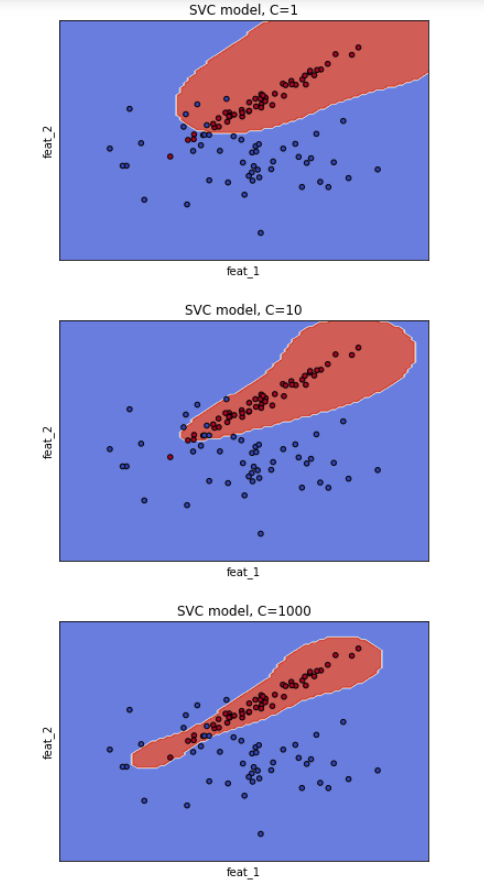

In [171]:
display.Image("https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/pic_for_last_question.png")

### How does `C` affect the boundary? Briefly explain your answer.

Write your answer in this block

**Answer:**

Larger `C` would reduce the margin between the classifier and the datapoint. Therefore, larger `C` would narrow down the classifier which returns a more limiting boundary that only classifies the most concentrated region given a category. 

Congrats! You have reached to the end of ps1.